In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,NaN,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,NaN,0.278030
3996,0.74741,0.428530
3997,NaN,0.085708
3998,0.70388,0.351420


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	741
float64		column 2	704


In [4]:
df.describe()

,column 1,column 2
count,3259.000000,3296.000000
mean,0.006076,0.004035
std,0.721713,0.725898
min,-1.714600,-1.376500
25%,-0.488395,-0.536890
50%,0.015683,0.000234
75%,0.523790,0.545937
max,1.363900,1.331700


<AxesSubplot:>

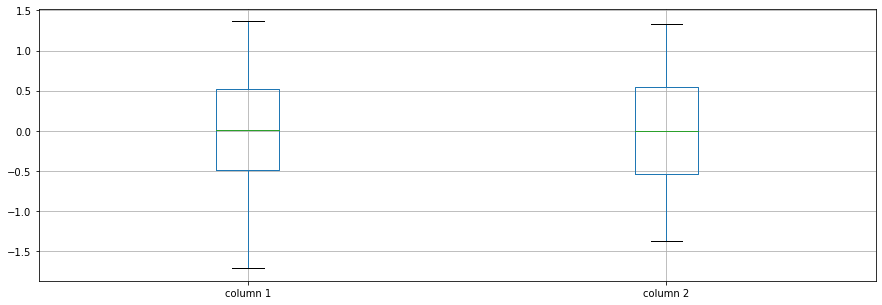

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.006076
column 2    0.004035
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,0.008284
column 2,0.008284,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [2,2+76,2+76+76,2+76+76+76,2+76+76+76+76,2+76+76+76,2+76+76,2+76,2], vae_layer = False, seed = 76)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.1748249661922454
Epoch: 1 , loss: 1.1741636757850646
Epoch: 2 , loss: 1.1746512916088103
Epoch: 3 , loss: 1.1759964528083802
Epoch: 4 , loss: 1.1744638862609864
Epoch: 5 , loss: 1.1745802977085114
Epoch: 6 , loss: 1.1735623972415925
Epoch: 7 , loss: 1.1734302153587342
Epoch: 8 , loss: 1.1744791028499604
Epoch: 9 , loss: 1.1743470911979674
Epoch: 10 , loss: 1.1509441447257995
Epoch: 11 , loss: 1.1073481240272522
Epoch: 12 , loss: 1.1044992725849152
Epoch: 13 , loss: 1.1019365544319153
Epoch: 14 , loss: 1.0987787885665894
Epoch: 15 , loss: 1.0938918216228486
Epoch: 16 , loss: 1.092807647705078
Epoch: 17 , loss: 1.0921325175762175
Epoch: 18 , loss: 1.0953556487560272
Epoch: 19 , loss: 1.0905331234931945
Epoch: 20 , loss: 1.0879385945796967
Epoch: 21 , loss: 1.089207303762436
Epoch: 22 , loss: 1.0992828078269958
Epoch: 23 , loss: 1.093202981710434
Epoch: 24 , loss: 1.0847201232910155
Epoch: 25 , loss: 1.0

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1   -0.592657
column 2   -1.258200
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2
0,0.459562,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
3995,-1.133596,0.0
3996,0.000000,0.0
3997,-1.032805,0.0
3998,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(29.542289446075806, 64.9340549279942)

In [17]:
NRMS=numerator/denominator
NRMS


0.45495833394103363

In [18]:
new_df.iloc[66,:]

column 1    0.123050
column 2    0.020062
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2
0,0.000902,-1.235200
1,0.243480,-0.873130
2,0.250710,-0.808030
3,0.214620,-0.951980
4,0.128290,-1.031400
...,...,...
3995,-0.240946,0.278030
3996,0.747410,0.428530
3997,0.043795,0.085708
3998,0.703880,0.351420


In [20]:
imputations[-1].to_excel("CNP_C_20(imp).xlsx", index=False, header=False)